In [17]:
import pandas as pd
from tld import get_tld
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

# Importing csv

In [18]:
df = pd.read_csv (r'DarmstadtSpider.csv')

In [19]:
df.head()

,from,url,text
0,https://www.darmstadt.de/leben-in-darmstadt/,http://www.iv-senioren-darmstadt.de/home.html,Interessenvertretung
1,https://www.darmstadt.de/leben-in-darmstadt/,http://www.darmstadt-stadtlexikon.de,Stadtlexikon
2,https://www.darmstadt.de/leben-in-darmstadt/,http://www.unserebroschuere.de/Stadt_Darmstadt...,Deutsch / Englisch
3,https://www.darmstadt.de/leben-in-darmstadt/,http://www.unserebroschuere.de/Stadt_Darmstadt...,Französisch / Spanisch
4,https://www.darmstadt.de/leben-in-darmstadt/,http://www.unserebroschuere.de/Stadt_Darmstadt...,Türkisch Arabisch


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11120 entries, 0 to 11119
Data columns (total 3 columns):
from    11120 non-null object
url     11120 non-null object
text    10737 non-null object
dtypes: object(3)
memory usage: 260.8+ KB


# Erweitern um die TLDs

In [21]:
l = []
for e in df['url']:
    l.append(get_tld(e, fail_silently=True))
df['tld'] = l

In [22]:
df.head()

,from,url,text,tld
0,https://www.darmstadt.de/leben-in-darmstadt/,http://www.iv-senioren-darmstadt.de/home.html,Interessenvertretung,de
1,https://www.darmstadt.de/leben-in-darmstadt/,http://www.darmstadt-stadtlexikon.de,Stadtlexikon,de
2,https://www.darmstadt.de/leben-in-darmstadt/,http://www.unserebroschuere.de/Stadt_Darmstadt...,Deutsch / Englisch,de
3,https://www.darmstadt.de/leben-in-darmstadt/,http://www.unserebroschuere.de/Stadt_Darmstadt...,Französisch / Spanisch,de
4,https://www.darmstadt.de/leben-in-darmstadt/,http://www.unserebroschuere.de/Stadt_Darmstadt...,Türkisch Arabisch,de


***
# Einfach Auswertung zu den TLDs

Aufsummierung der tlds aus dem Feld 'url'

In [23]:
df['tld'].value_counts()

de      8806
com     1796
org      259
net      107
eu        37
info      35
be        21
in         9
ch         7
gov        7
ag         7
Name: tld, dtype: int64

Erzeugen einer grafischen Darstellung

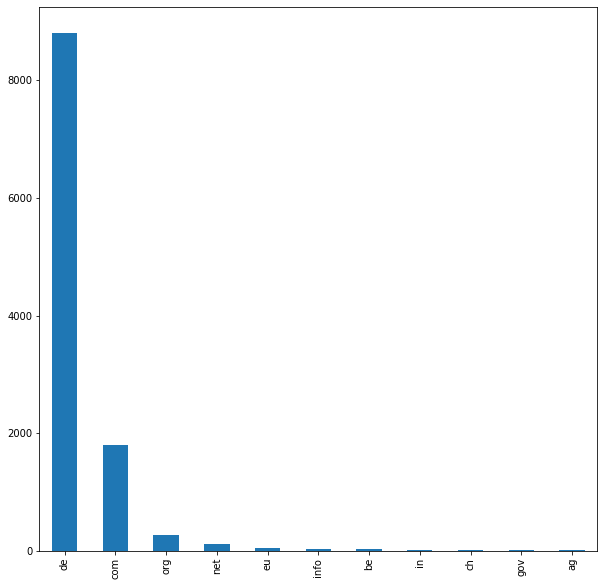

In [35]:
df['tld'].value_counts().plot(kind='bar', figsize=(10,10))

Aufsummierung der tlds aus dem Feld 'url' und Berechnung des Anteils am Gesamten. Anschließend grafische Darstellung als Pie Chart.

In [25]:
df['tld'].value_counts(normalize=True)

de      0.793977
com     0.161933
org     0.023352
net     0.009647
eu      0.003336
info    0.003156
be      0.001893
in      0.000811
ch      0.000631
gov     0.000631
ag      0.000631
Name: tld, dtype: float64

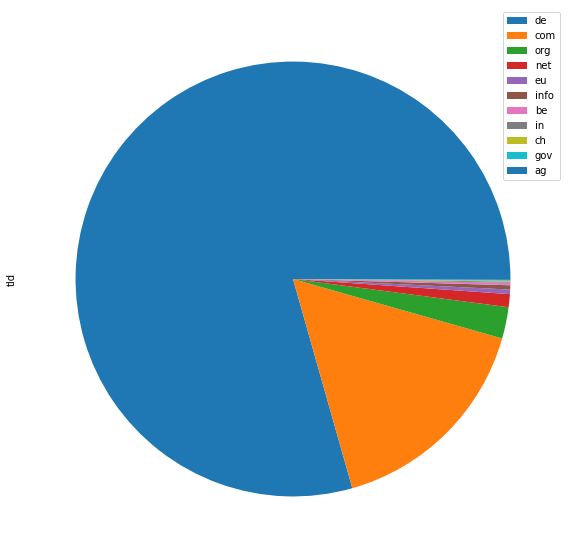

In [36]:
df['tld'].value_counts(normalize=True).plot.pie(legend=True, labels=None, figsize=(10,10))

***
# Häufig Verlinkte URLs identifizieren

Zusammenfassen der gleichen URLs und Zählen von dessen Vorkommen.

In [27]:
dfurl_counts = df['url'].value_counts()
dfurl_counts.head()

http://www.darmstadt-stadtlexikon.de                                                                                      1662
http://www.iv-senioren-darmstadt.de/home.html                                                                             1659
https://app-eu.readspeaker.com/cgi-bin/rsent?customerid=9630&lang=de_de&readclass=content&url=                            1659
http://www.ladadi.de/bildung-schule/bildungsbuero-schulentwicklung/bildungsregion-darmstadt-und-darmstadt-dieburg.html      98
https://www.klimaschutz.de/                                                                                                 63
Name: url, dtype: int64

Es fällt auf, dass es 3 Seiten gibt auf die besonders häufig verwiesen wird:
- Stadtlexikon
- IV Senioren Darmstadt
- Readspeaker

Je nach Anwendungsfall können diese Seiten uninteressant sein, dann müsste man diese entfernen. Der genaue Anwendungsfall ist hier aber nicht bekannt.

Überführen der verlinkenden Seiten in Listen speziell für die 3 Seiten mit den größten Vorkommen.

In [28]:
dfurl_grouped = df.groupby('url')

In [29]:
df_lexicon_referrers = dfurl_grouped.get_group('http://www.darmstadt-stadtlexikon.de').reset_index()
df_iv_referrers = dfurl_grouped.get_group('http://www.iv-senioren-darmstadt.de/home.html').reset_index()
df_readspeaker_referrers = dfurl_grouped.get_group('https://app-eu.readspeaker.com/cgi-bin/rsent?customerid=9630&lang=de_de&readclass=content&url=').reset_index()

Testweise Ausgabe einer entstandenen Liste bzw. eines einzelnen Werts

In [30]:
df_lexicon_referrers

,index,from,url,text,tld
0,1,https://www.darmstadt.de/leben-in-darmstadt/,http://www.darmstadt-stadtlexikon.de,Stadtlexikon,de
1,7,https://www.darmstadt.de/leben-in-darmstadt/so...,http://www.darmstadt-stadtlexikon.de,Stadtlexikon,de
2,19,https://www.darmstadt.de/leben-in-darmstadt/so...,http://www.darmstadt-stadtlexikon.de,Stadtlexikon,de
3,36,https://www.darmstadt.de/leben-in-darmstadt/so...,http://www.darmstadt-stadtlexikon.de,Stadtlexikon,de
4,40,https://www.darmstadt.de/leben-in-darmstadt/so...,http://www.darmstadt-stadtlexikon.de,Stadtlexikon,de
...,...,...,...,...,...
1657,11010,https://www.darmstadt.de/leben-in-darmstadt/bi...,http://www.darmstadt-stadtlexikon.de,Stadtlexikon,de
1658,11021,https://www.darmstadt.de/leben-in-darmstadt/bi...,http://www.darmstadt-stadtlexikon.de,http://www.darmstadt-stadtlexikon.de,de
1659,11050,https://www.darmstadt.de/leben-in-darmstadt/bi...,http://www.darmstadt-stadtlexikon.de,Stadtlexikon,de
1660,11095,https://www.darmstadt.de/leben-in-darmstadt/bi...,http://www.darmstadt-stadtlexikon.de,Stadtlexikon,de


In [31]:
df_lexicon_referrers['from'][0]

'https://www.darmstadt.de/leben-in-darmstadt/'

Es handelt sich um ein Link, der in nahezu jeder Unterseite der Seite www.darmstadt.de/leben-in-darmstadt/ vorhanden ist. Er befindet sich im DropDown Menü "Oft Gesucht".
***

Gleiches gilt für die Verlinkung zur Seniorenvertretung. Dieser Link befindet sich ebenfalls im DropDown Menü 'Oft gesucht'. Ein anderer Fall ist die Verlinkung zu Readspeaker. Es handelt sich hierbei um eine Text to Speech Lösung. Diese befindet sich ebenfalls als Button auf vielen Seiten und ermöglicht das Vorlesen der Webseite.

In [16]:
dfurl_counts[3:20]

http://www.ladadi.de/bildung-schule/bildungsbuero-schulentwicklung/bildungsregion-darmstadt-und-darmstadt-dieburg.html         98
https://www.klimaschutz.de/                                                                                                    63
http://www.rmv.de/auskunft/                                                                                                    42
http://www.onleihe.de/darmstadt/frontend/welcome,51-0-0-100-0-0-1-0-0-0-0.html                                                 35
https://arcinsys.hessen.de/arcinsys/llist?nodeid=g105233&page=1&reload=true&sorting=41                                         35
https://www.munzinger.de/search/login-portal.jsp?portalid=50700                                                                35
http://www.cityguide-darmstadt.de/stadtatlas/cgi-bin/cityguide.pl?action=show&lang=de&size=8660&mapper=1&zoom=50&group=34.1    32
http://www.familien-willkommen.de/                                                        

Weitere häufige Themen sind im Spektrum Bildung, Familie, Archiv und Umwelt angesiedelt.
***

Zusätzliche Statistik:
Wie hoch ist der Anteil der referenzierten URLs die eine sichere Verbindung nutzen?

In [60]:
unique_url = df['url'].drop_duplicates()

In [69]:
l = []
for e in unique_url:
    tld = get_tld(e, fail_silently=True, as_object=True)
    if tld != None:
        l.append(tld.parsed_url.scheme)

In [97]:
schemes = pd.DataFrame(l, columns=['encrypted'])
schemes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 1 columns):
encrypted    791 non-null object
dtypes: object(1)
memory usage: 6.3+ KB


In [103]:
schemes['encrypted'].value_counts(normalize=True)

http     0.738306
https    0.261694
Name: encrypted, dtype: float64

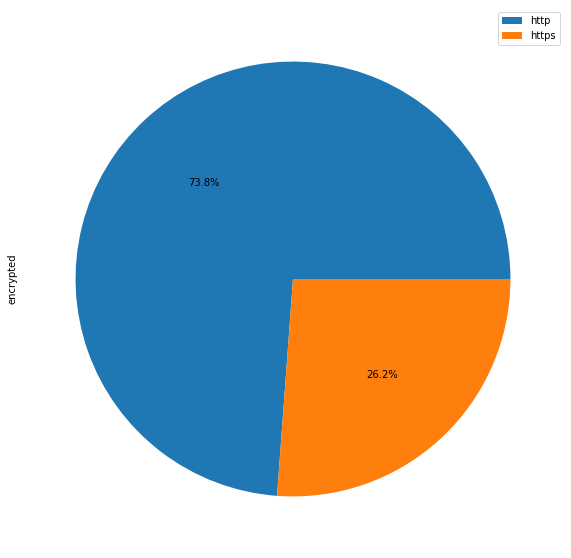

In [104]:
schemes['encrypted'].value_counts(normalize=True).plot.pie(legend=True, labels=None, figsize=(10,10), autopct='%1.1f%%')

Die Verbindung zu den Seiten ist nur in etwa ein Viertel der Fälle verschlüsselt.